In [23]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('baseball.csv')

In [24]:
df["W"].unique() # Checking the output

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [25]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(30, 17)

# EDA
## 1. Null/Nan

In [26]:
df.isnull().sum() 

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [28]:
df.nunique().to_frame("No of unique values")

,No of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


## Note 1: Observations:
- Shape 30 * 17
- No Object in Data frame
- No Null values
- Regression model will be applied


In [29]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Note 2: Observations:
- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - BB,SO,RA, ER --> Left Skewed
- Median (50%) < Mean - "AB,H,HR,CG,SV,E" -> Right Skewed
- Standard Dev - AB, SO, RA, ER
- Percentile 75% and max : HR, SO, SB,CG, SHO, SV,E  outliars are present

In [30]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

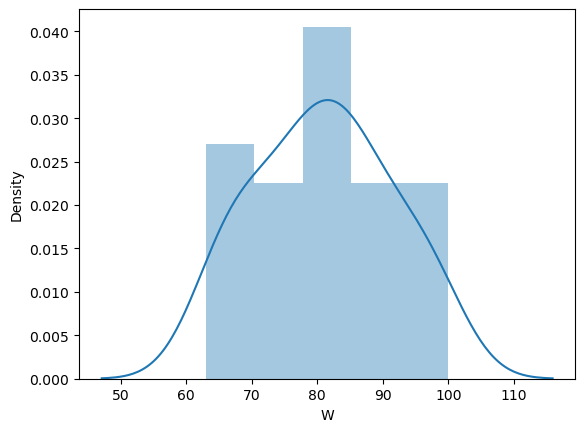

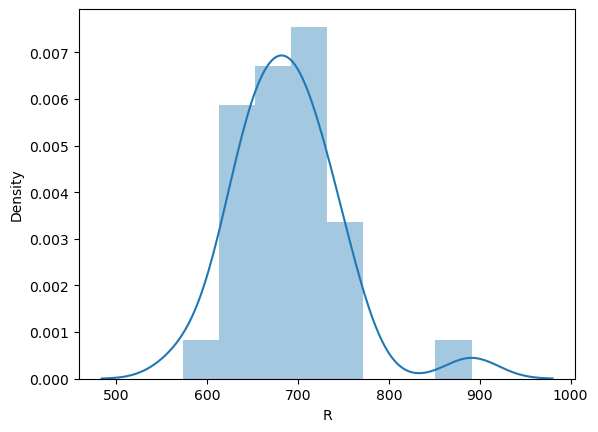

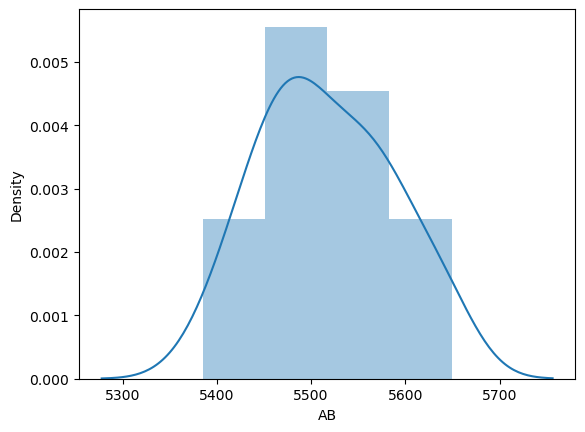

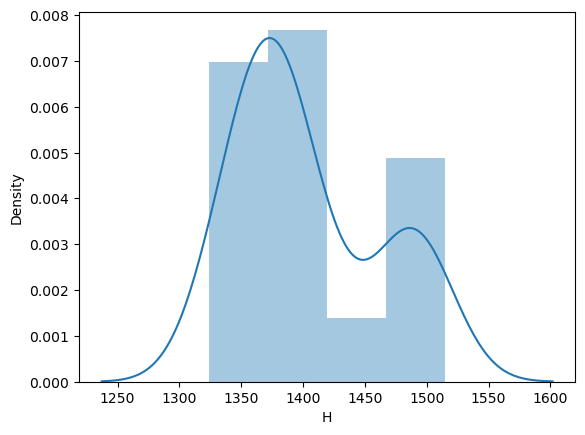

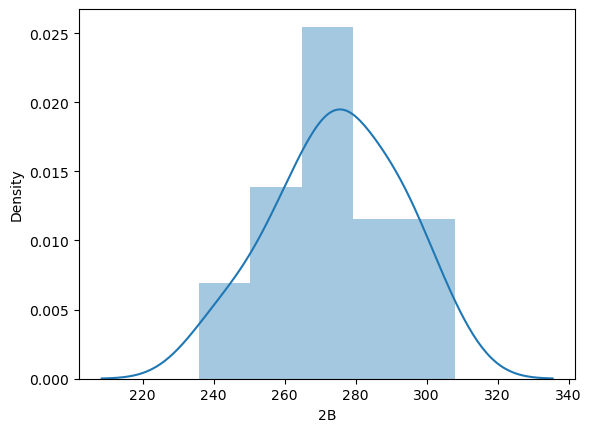

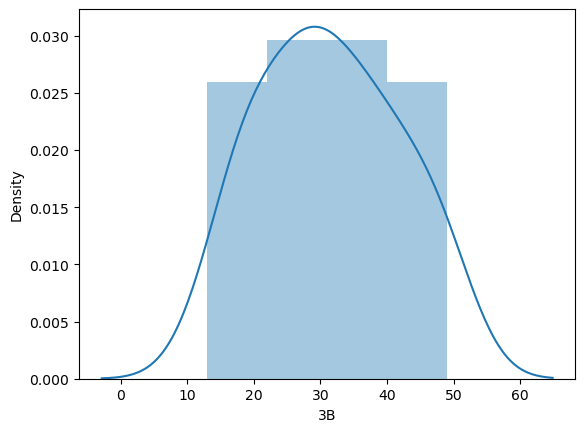

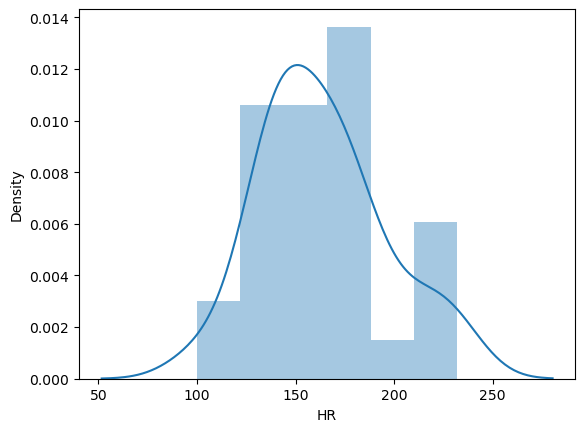

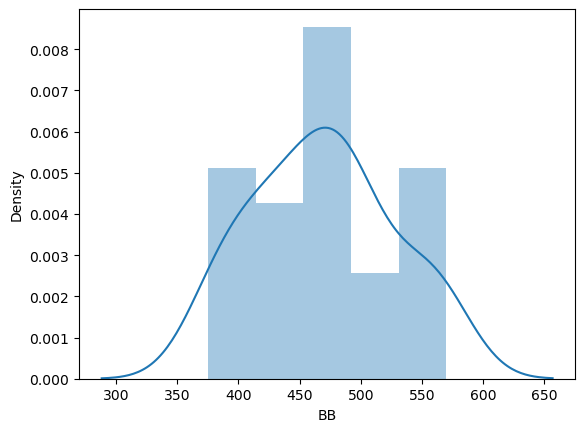

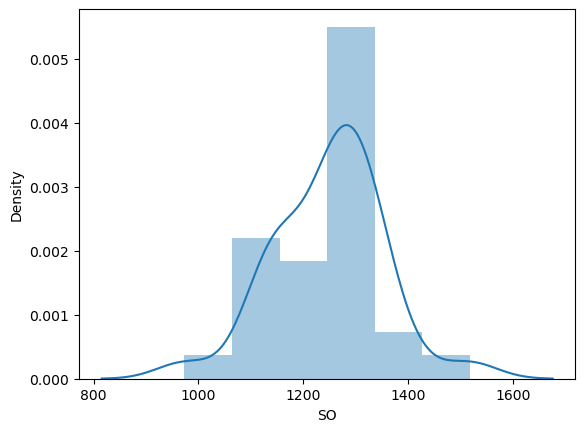

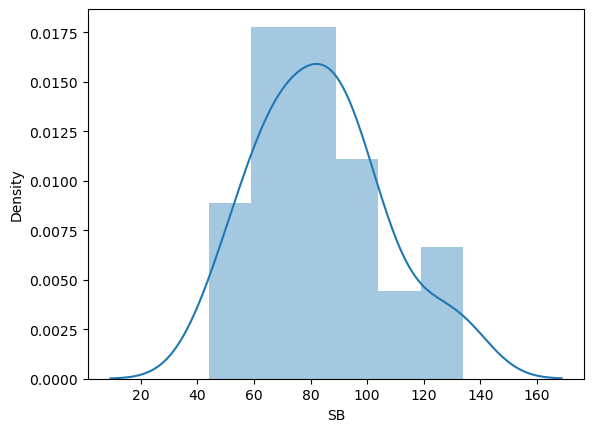

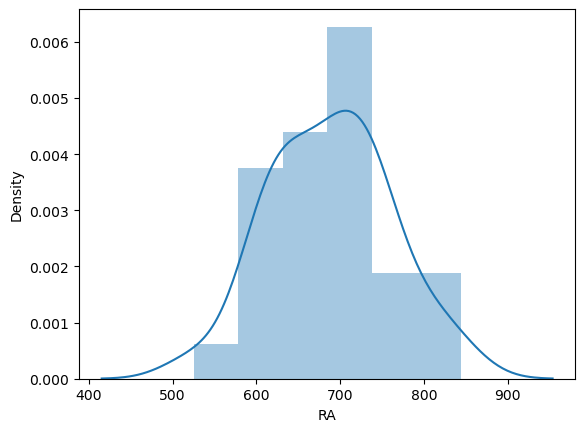

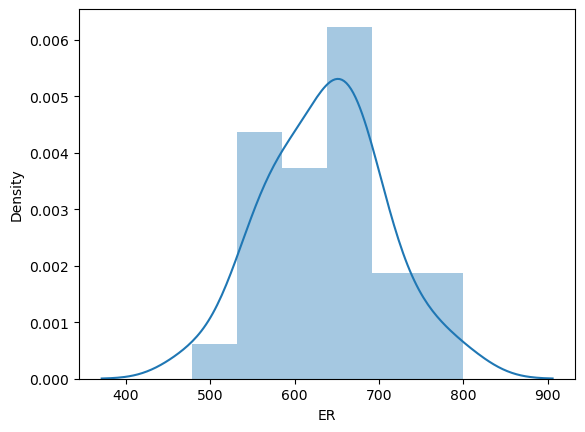

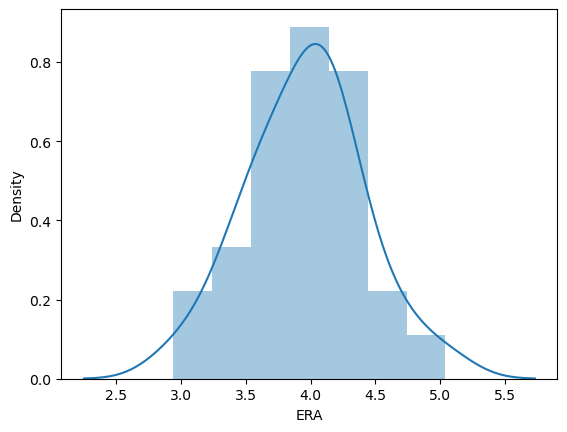

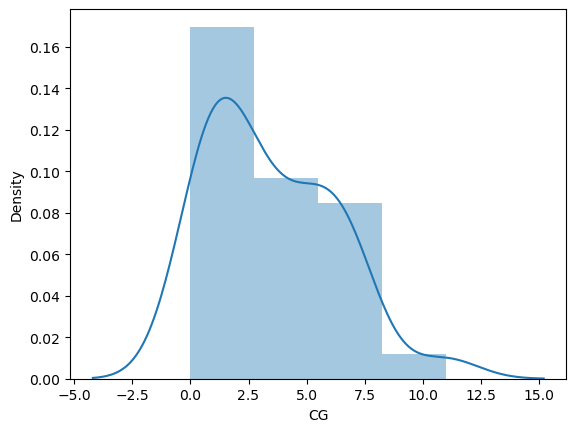

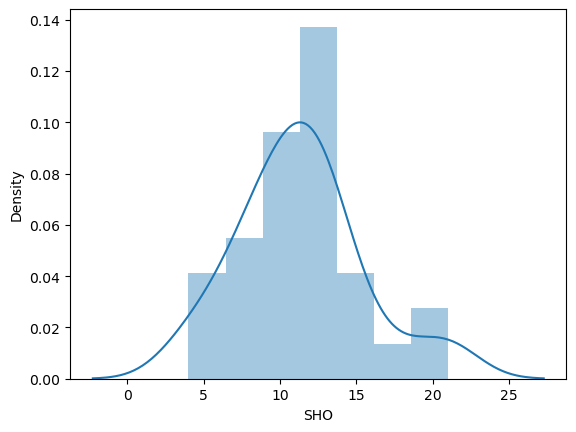

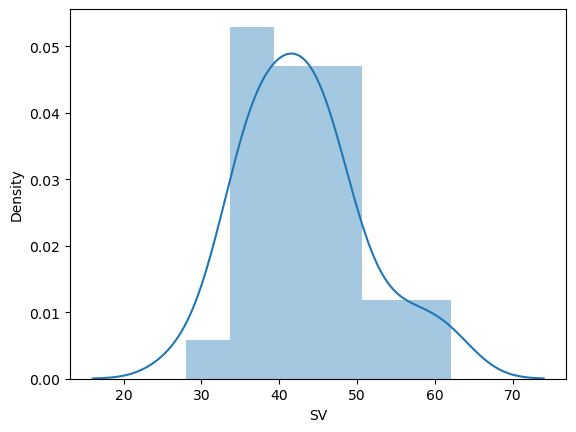

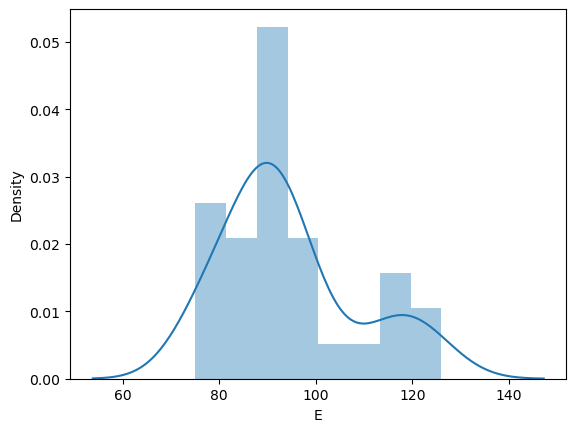

In [16]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

W         Axes(0.125,0.825775;0.168478x0.0542254)
R      Axes(0.327174,0.825775;0.168478x0.0542254)
AB     Axes(0.529348,0.825775;0.168478x0.0542254)
H      Axes(0.731522,0.825775;0.168478x0.0542254)
2B        Axes(0.125,0.760704;0.168478x0.0542254)
3B     Axes(0.327174,0.760704;0.168478x0.0542254)
HR     Axes(0.529348,0.760704;0.168478x0.0542254)
BB     Axes(0.731522,0.760704;0.168478x0.0542254)
SO        Axes(0.125,0.695634;0.168478x0.0542254)
SB     Axes(0.327174,0.695634;0.168478x0.0542254)
RA     Axes(0.529348,0.695634;0.168478x0.0542254)
ER     Axes(0.731522,0.695634;0.168478x0.0542254)
ERA       Axes(0.125,0.630563;0.168478x0.0542254)
CG     Axes(0.327174,0.630563;0.168478x0.0542254)
SHO    Axes(0.529348,0.630563;0.168478x0.0542254)
SV     Axes(0.731522,0.630563;0.168478x0.0542254)
E         Axes(0.125,0.565493;0.168478x0.0542254)
dtype: object

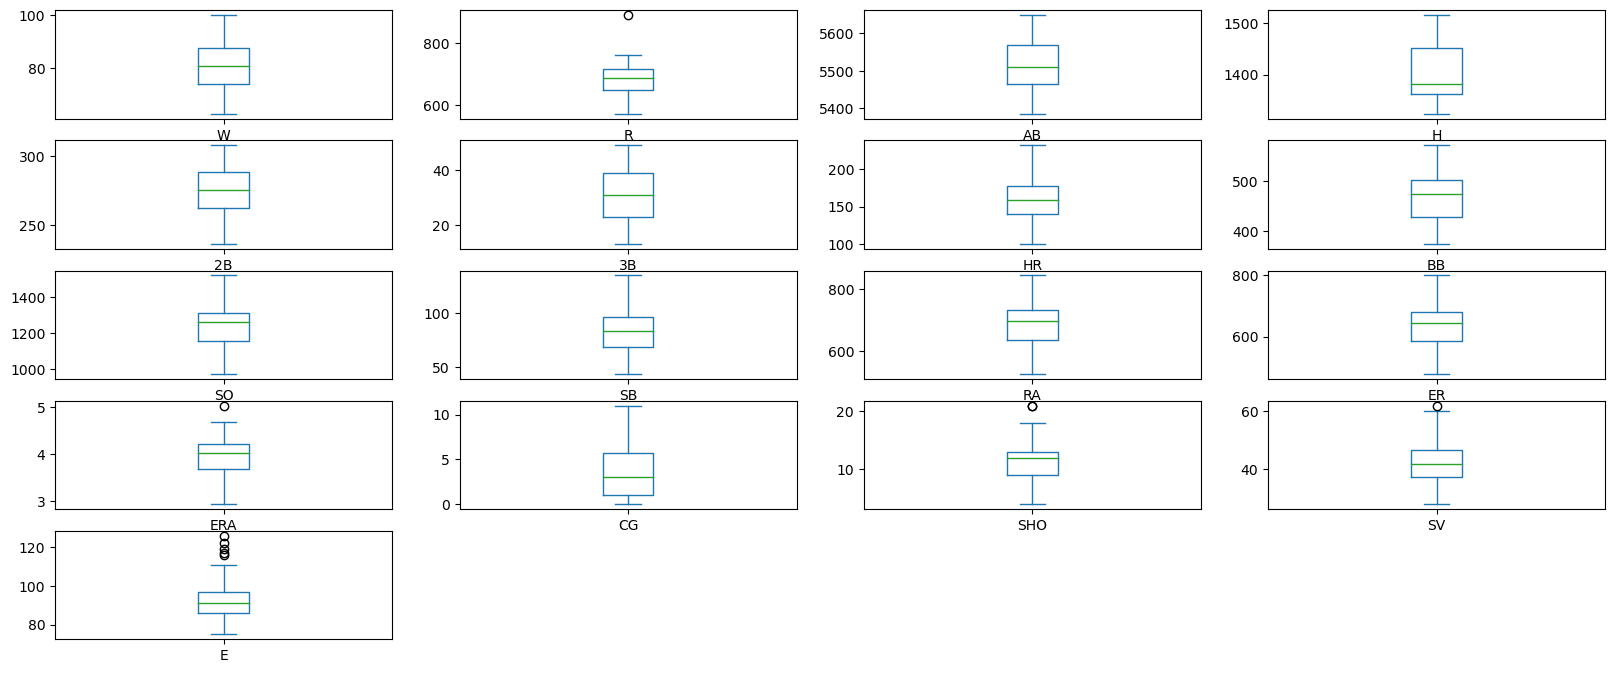

In [17]:
df.plot(kind='box',subplots=True,layout=(12,4),figsize=(20,20))

## Note 3: Observations: 
- No Major Skewness observed.
- E has major outliares. Others having outliars are ERA, SHO, SV

In [31]:
from scipy.stats import zscore # Removing Outliars
ol = ['E']
for i in ol:
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100) 

Data loss rate 0.0


## Note 4: Data frame changed to DF1

# 4. Co- Relation and Multicolinearity

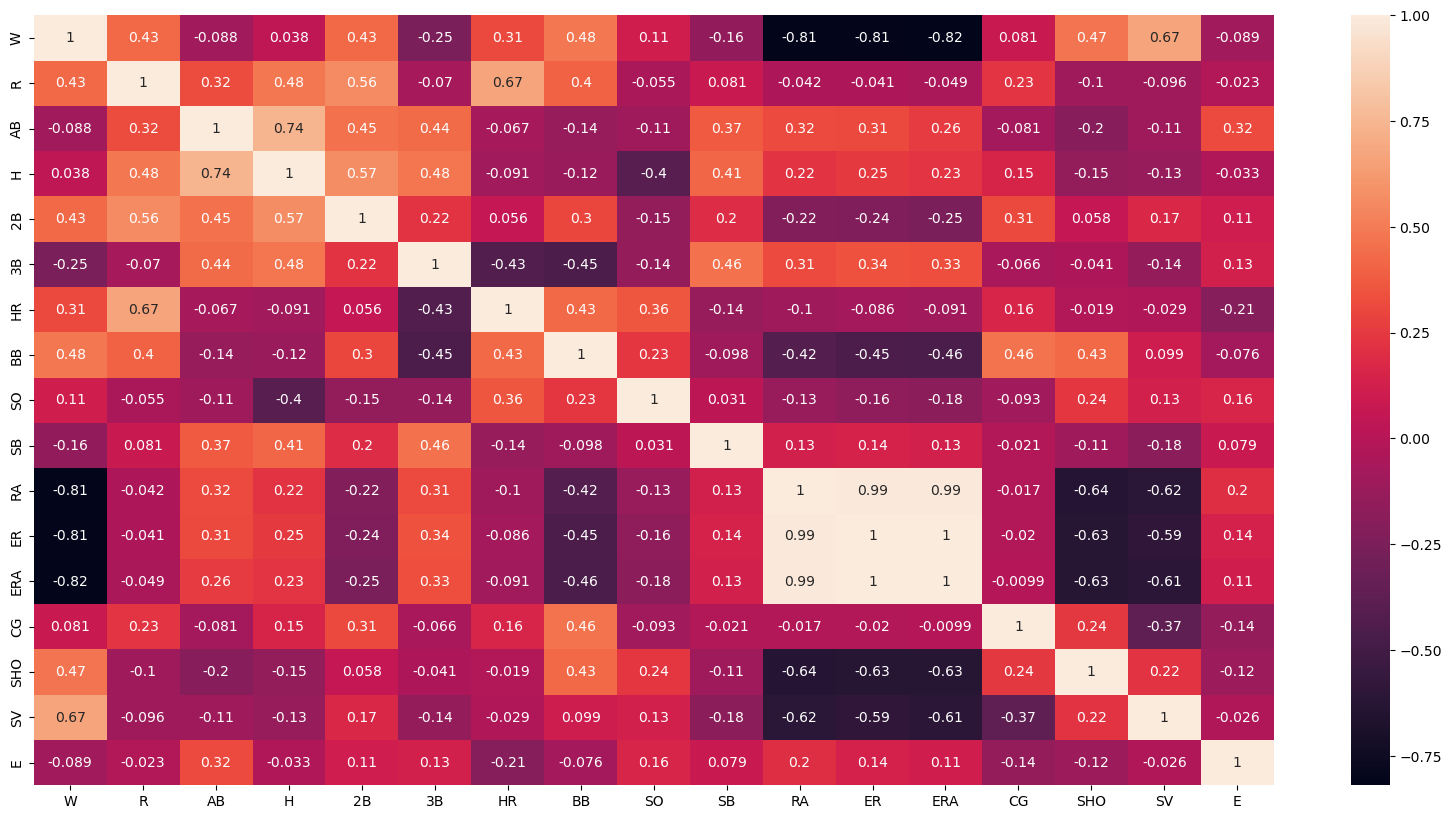

In [156]:
corr_hmap=df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

## Note 5: Observations: 
- V Low Co-relations Near to Zero :  E, SB, SO, CG, H,AB
- Low Co-relation    0.3 or >-0.3 --> SHO, BB, HR, 3B, 3B, 2B, R
- Mod Co-relation    0.5 or >-0.5 --> SV, SHO
- Hig Co-relation    0.7 or >-0.7 --> RA , ER, ERA

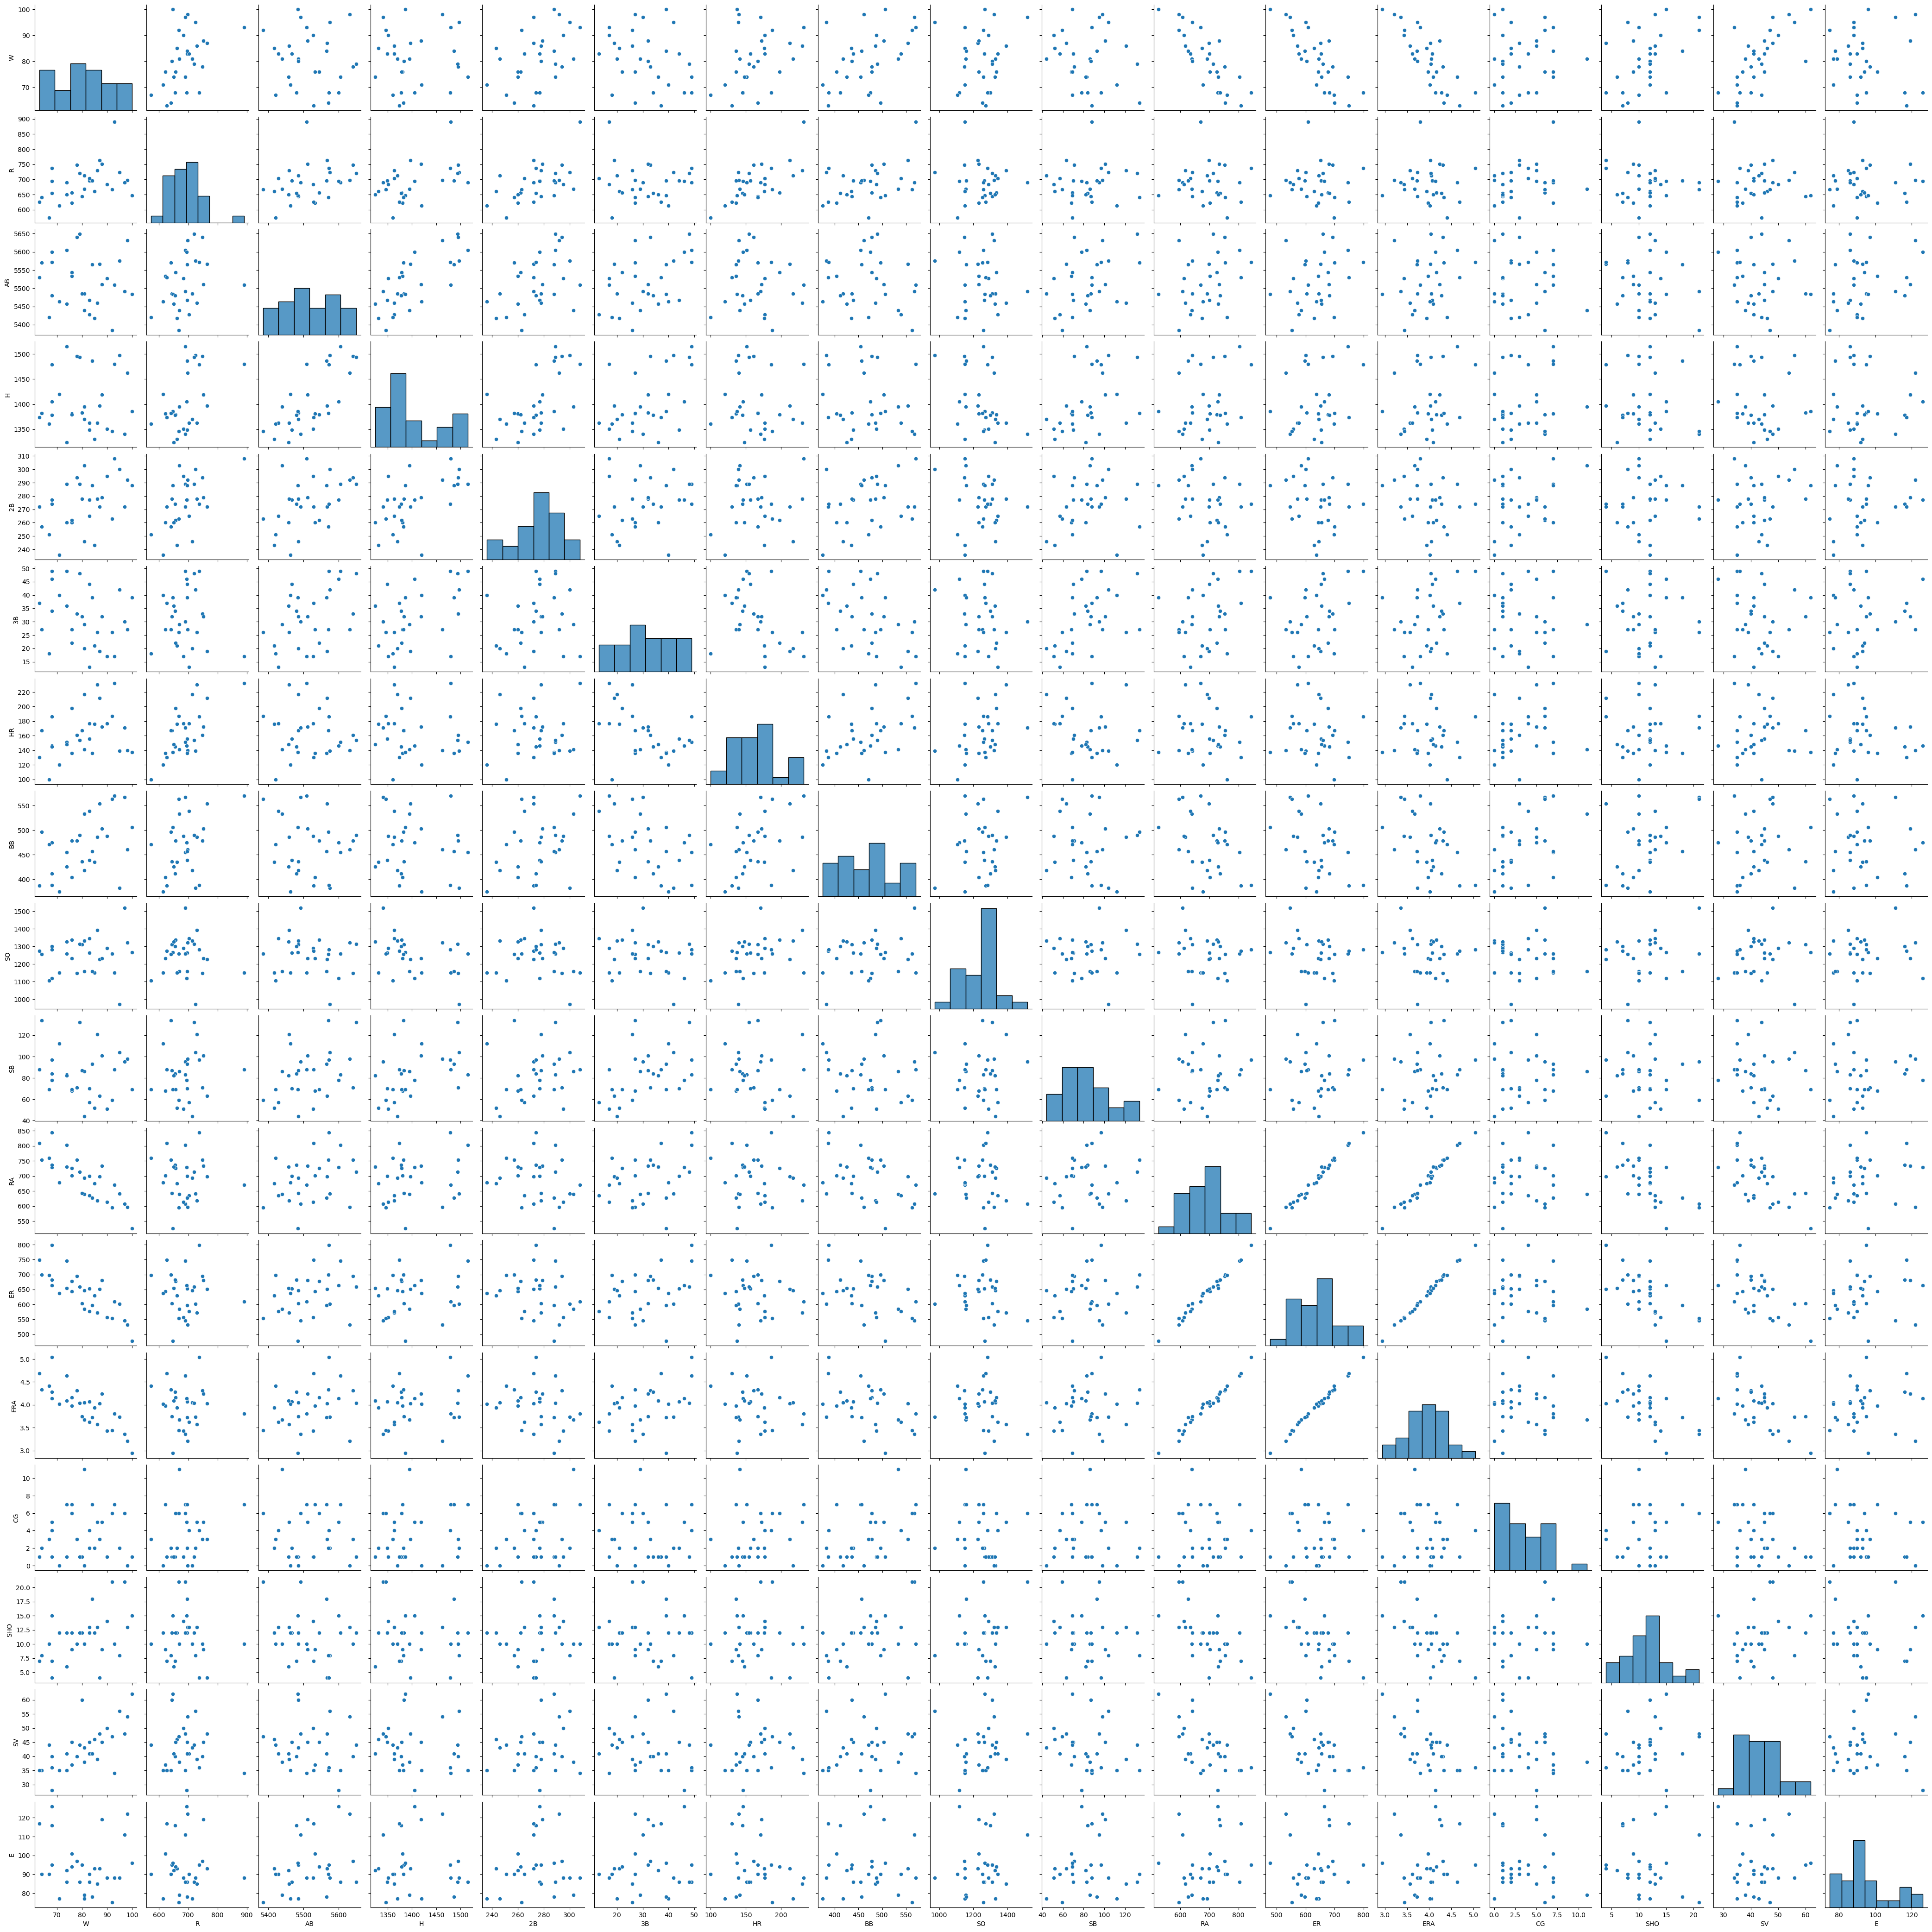

In [161]:
sns.pairplot(df)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # To find Multi Colinearity
x=df1.iloc[:,1:]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

      VIF Factor features
0    1638.985029        R
1    4277.157018       AB
2    4698.798408        H
3     904.439835       2B
4      32.435486       3B
5     285.773237       HR
6     269.485018       BB
7     398.234104       SO
8      28.654970       SB
9   17204.829356       RA
10  49837.289228       ER
11  23551.544014      ERA
12      6.771036       CG
13     30.276598      SHO
14    119.686080       SV
15     94.215202        E


In [33]:
columns_to_drop=["ER","H","AB"]
df1 = df1.drop(columns_to_drop, axis=1)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df1.iloc[:,0:-1]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

     VIF Factor features
0    849.208974        W
1   2008.108470        R
2    818.642042       2B
3     28.029084       3B
4    175.924067       HR
5    243.557600       BB
6    331.069494       SO
7     22.131364       SB
8   6957.638741       RA
9   5775.408030      ERA
10     8.050151       CG
11    26.001287      SHO
12   245.677920       SV


# MODEL

# 1. Feature Scaling using Standard Scalarization

In [36]:
y=df1["W"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


## 2. Best random state value:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor


maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 1.0  at random state  1


# 3. Creating train test split

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# 4. Classification Algorithms and Cross Validation Score

R2_score:   LinearRegression()  is  1.0
R2_score_Training Data:   LinearRegression()  is  100.0
error:
Mean Absolute error 1.4210854715202004e-14
Mean Squared error 3.365806528942984e-28
Root Mean Squared error 1.8346134549116834e-14


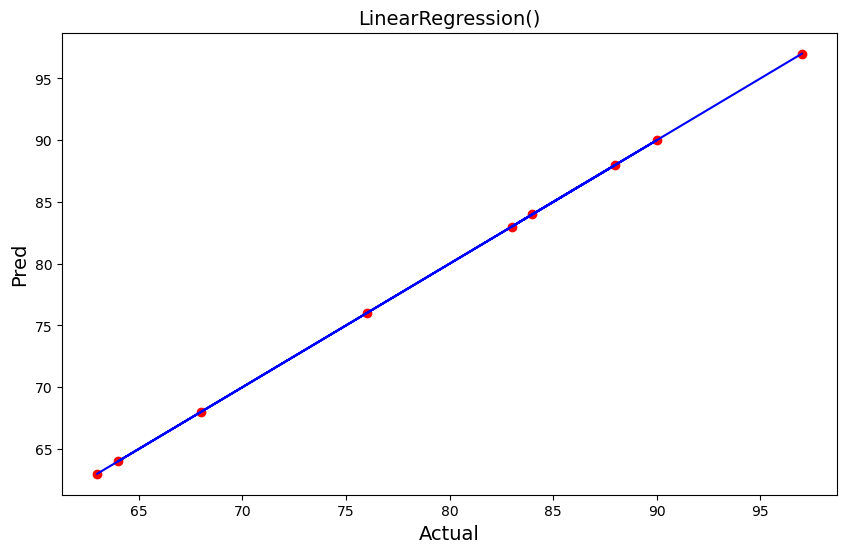

Cross Validation of:   LinearRegression()  is 
[1. 1. 1. 1. 1.]
1.0
Diff in Acc Score and Cross Val Score is -  0.0


R2_score:   RandomForestRegressor()  is  0.9008309209284769
R2_score_Training Data:   RandomForestRegressor()  is  99.18528830674667
error:
Mean Absolute error 3.225555555555557
Mean Squared error 12.975233333333348
Root Mean Squared error 3.6021151193893495


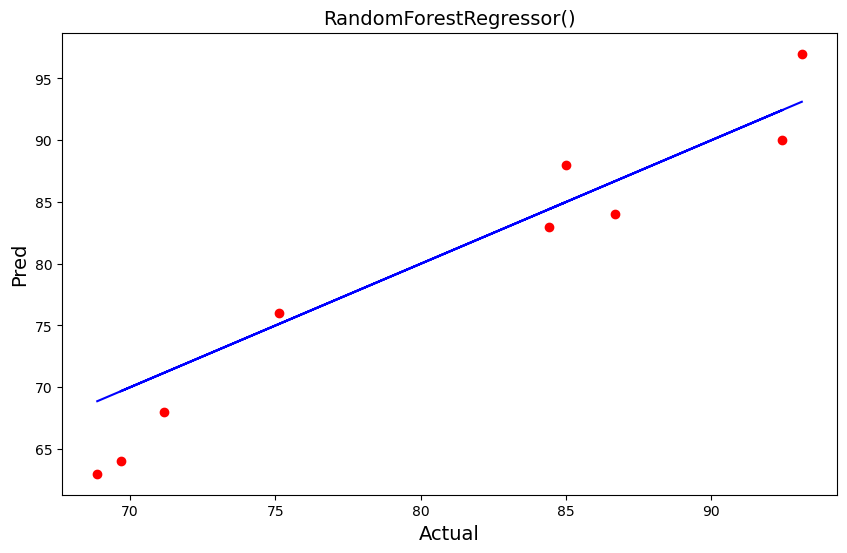

Cross Validation of:   RandomForestRegressor()  is 
[0.85053739 0.70139351 0.82019044 0.92901595 0.94645337]
0.8495181329440029
Diff in Acc Score and Cross Val Score is -  5.131278798447402


R2_score:   DecisionTreeRegressor()  is  0.8828080769956596
R2_score_Training Data:   DecisionTreeRegressor()  is  100.0
error:
Mean Absolute error 3.111111111111111
Mean Squared error 15.333333333333334
Root Mean Squared error 3.9157800414902435


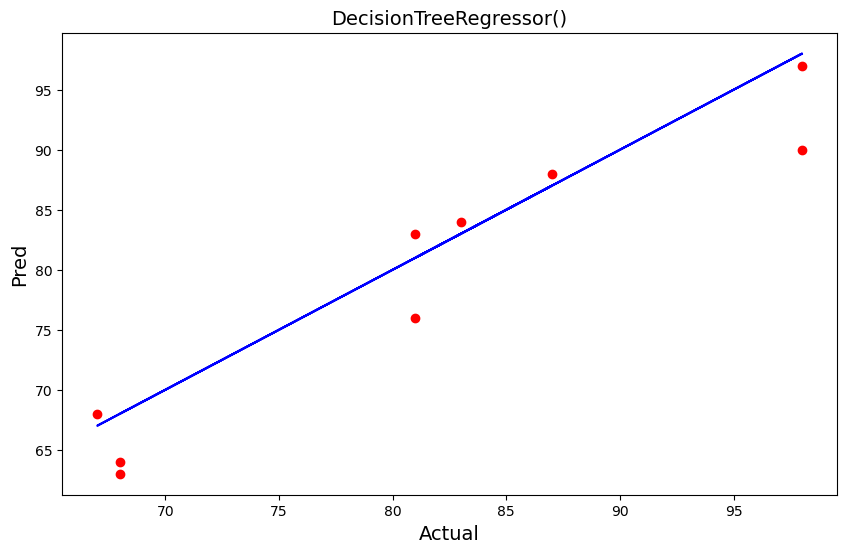

Cross Validation of:   DecisionTreeRegressor()  is 
[ 0.91740675 -0.36259542  0.86747906  0.77017268  0.9147929 ]
0.6214511938346344
Diff in Acc Score and Cross Val Score is -  26.135688316102513


R2_score:   KNeighborsRegressor()  is  0.7302547650500094
R2_score_Training Data:   KNeighborsRegressor()  is  69.57207668666763
error:
Mean Absolute error 4.955555555555557
Mean Squared error 35.29333333333333
Root Mean Squared error 5.940819247657122


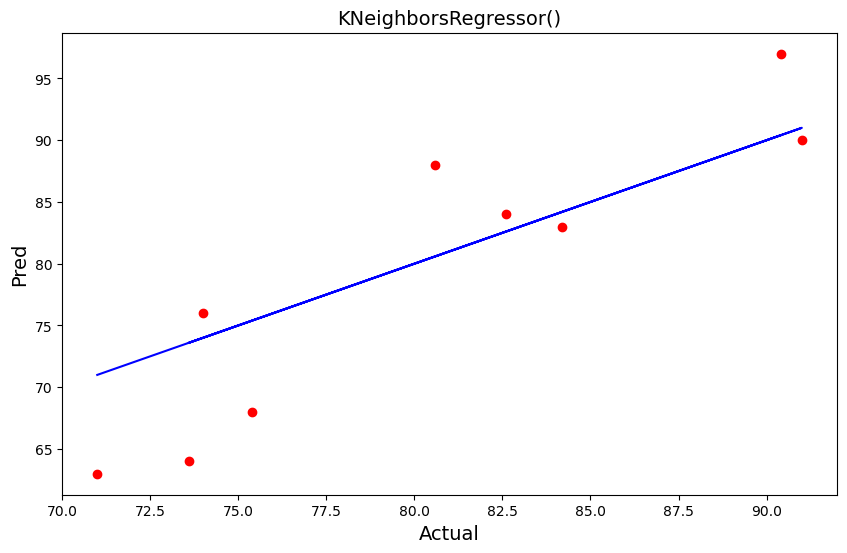

Cross Validation of:   KNeighborsRegressor()  is 
[ 0.4774778  -0.93969466  0.18718964  0.51630769  0.60414201]
0.16908449744158258
Diff in Acc Score and Cross Val Score is -  56.117026760842684


R2_score:   Lasso()  is  0.987197698898092
R2_score_Training Data:   Lasso()  is  98.77778318877563
error:
Mean Absolute error 1.0967650293319149
Mean Squared error 1.6750467540496532
Root Mean Squared error 1.2942359730936446


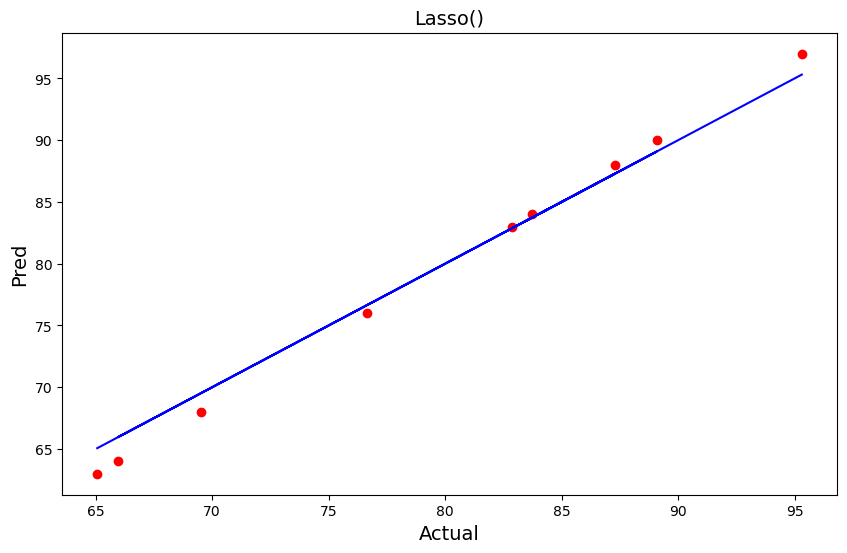

Cross Validation of:   Lasso()  is 
[0.99041266 0.98945511 0.97795726 0.97731197 0.98692605]
0.9844126108901241
Diff in Acc Score and Cross Val Score is -  0.278508800796784


R2_score:   Ridge()  is  0.9722148626062757
R2_score_Training Data:   Ridge()  is  99.12207299853888
error:
Mean Absolute error 1.4498748583508734
Mean Squared error 3.6353936555393838
Root Mean Squared error 1.906670830410793


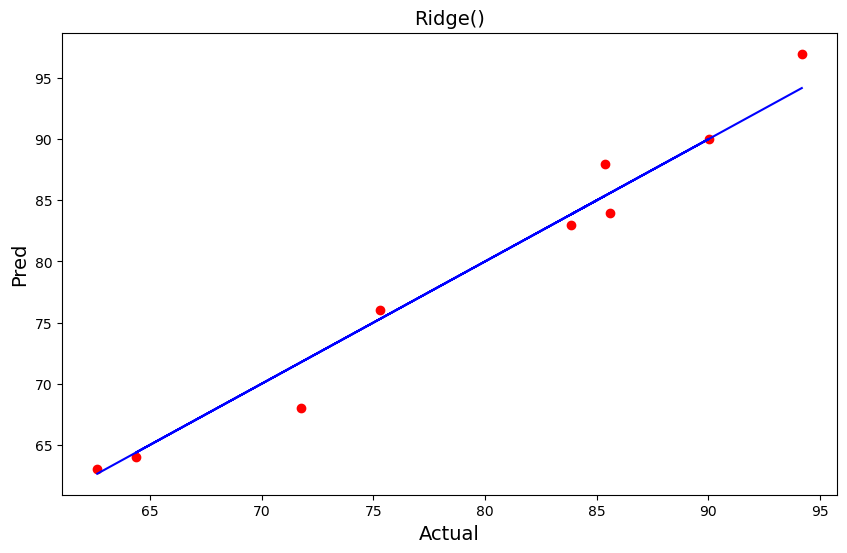

Cross Validation of:   Ridge()  is 
[0.97853602 0.72783055 0.94987525 0.98750616 0.9944523 ]
0.9276400560767091
Diff in Acc Score and Cross Val Score is -  4.457480652956658


R2_score:   SVR()  is  0.19978957132391373
R2_score_Training Data:   SVR()  is  24.09550768864176
error:
Mean Absolute error 8.845381585392229
Mean Squared error 104.69913732233532
Root Mean Squared error 10.232259639118592


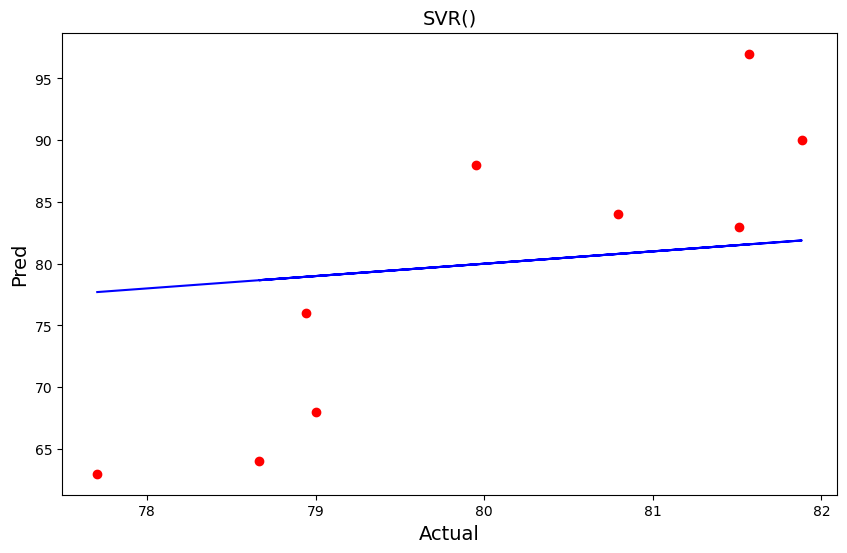

Cross Validation of:   SVR()  is 
[-0.06633764 -0.51991524 -0.20003524 -0.48055379  0.04345342]
-0.24467769650199372
Diff in Acc Score and Cross Val Score is -  44.446726782590744


R2_score:   ExtraTreesRegressor()  is  0.9561151915455746
R2_score_Training Data:   ExtraTreesRegressor()  is  100.0
error:
Mean Absolute error 1.791111111111113
Mean Squared error 5.741866666666673
Root Mean Squared error 2.3962192442818484


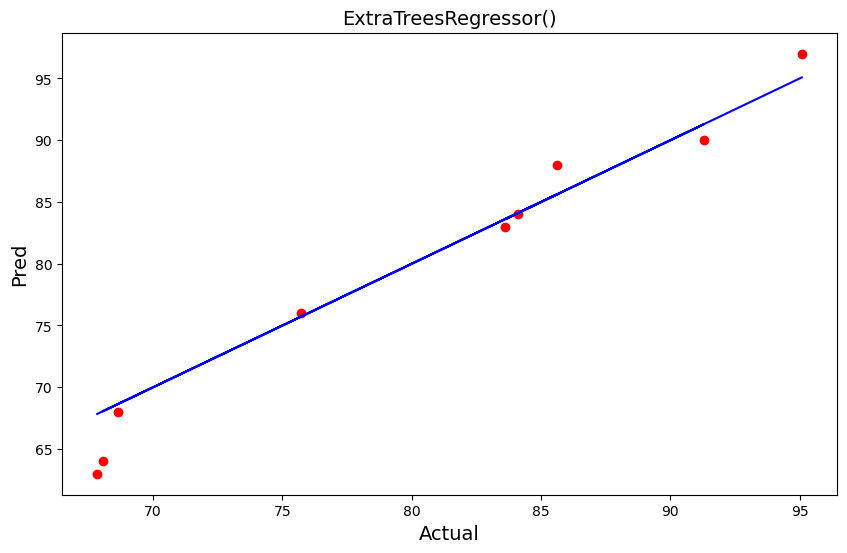

Cross Validation of:   ExtraTreesRegressor()  is 
[0.89020133 0.70061603 0.86859155 0.99080144 0.97247243]
0.8845365558133512
Diff in Acc Score and Cross Val Score is -  7.157863573222334




In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB


lr= LinearRegression()
rfc=RandomForestRegressor()
dtr=DecisionTreeRegressor()
kn=KNN()
ls=Lasso()
rd=Ridge()
svr=SVR()
etr=ExtraTreesRegressor()




model=[lr,rfc,dtr,kn,ls,rd,svr,etr]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    
    print("R2_score:  ",m," is " ,r2_score(y_test,predm))
    print("R2_score_Training Data:  ",m," is " ,r2_score(y_train,pred_train)*100)
    print("error:")
    
    print("Mean Absolute error",mean_absolute_error(y_test,predm))
    print("Mean Squared error",mean_squared_error(y_test,predm))
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,predm)))
   
    plt.figure(figsize=(10,6))
    plt.scatter(x=predm,y=y_test,color="r")
    plt.plot(predm,predm,color="b")
    plt.xlabel("Actual",fontsize=14)
    plt.ylabel("Pred",fontsize=14)
    plt.title(m,fontsize=14)
    plt.show()
    score = cross_val_score(m,x,y)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",(r2_score(y_test,predm)-score.mean())*100)
    print("\n")

# LinearRegression is the best model with least error

# 5. Hyper Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "fit_intercept": [True, False],

}

# Instantiate GridSearchCV without "precomputed" kernel
GCV = GridSearchCV(LinearRegression(), parameters, cv=5)
GCV.fit(x_train, y_train)
print(GCV.best_params_)



{'fit_intercept': True}


In [45]:
Final_model = LinearRegression(fit_intercept=True)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

print("R2_score:",r2_score(y_test,pred))

print("Mean Absolute error",mean_absolute_error(y_test,pred))
print("Mean Squared error",mean_squared_error(y_test,pred))
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))

100.0
R2_score: 1.0
Mean Absolute error 1.4210854715202004e-14
Mean Squared error 3.365806528942984e-28
Root Mean Squared error 1.8346134549116834e-14


# Saving the Model

In [46]:
import joblib # save as *.pkl
joblib.dump(Final_model,"baseball.pkl")

['baseball.pkl']